<a href="https://colab.research.google.com/github/sopranomax/DataScienceClasses/blob/main/Data201_Project1_Obesity.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Data 201 Project 1 Obesity Data
### Marilyn Macy and Kris Sutton
### November 4, 2021

## Dataset - Estimation of obesity levels based on eating habits and physical condition
### Source: UCI Machine Learning Repository
#### https://archive-beta.ics.uci.edu/ml/datasets/estimation+of+obesity+levels+based+on+eating+habits+and+physical+condition

Additional Source: Kaggle
https://www.kaggle.com/pmrich/obesitydataset-eda-data-prep-ml-hypertuning


### Dataset information

The dataset includes data for the estimation of obesity levels in individuals from the countries of Mexico, Peru and Colombia, based on their eating habits and physical condition. The dataset was contributed to the UCI Machine Learning Repository on 2019-08-27.

**Number of observations:** 2111

**Number of variables:** 17

**Data Dictionary:**  

Category	| Feature Name | Description | Variable Type
--------- | ------------ | ------------ | -------------- 
Target Variable | NObesity | Based on BMI | Categorical
Eating Habits |	FAVC | Frequent consumption of high caloric food | Categorical 
Eating Habits |	FCVC | Frequency of consumption of vegetables	| Ordinal 
Eating Habits	| NCP | Number of main meals | Ordinal
Eating Habits	| CAEC | Consumption of food between meals | Ordinal
Eating Habits	| CH20 | Consumption of water daily | Ordinal
Eating Habits	| CALC | Consumption of alcohol | Ordinal
Physical Conditioning | SCC | Calories consumption monitoring | Categorical
Physical Conditioning | FAF	| Pysical activity frequency | Ordinal
Physical Conditioning | TUE	| Time using technology devices | Ordinal
Physical Conditioning | MTRANS | Transportation used | Categorical
Physical Conditioning | SMOKE |	Smokes Yes or No | Categorical
Responder Characteristics | Family History with Overweight | Yes or No | Categorical
Responder Charateristics | Gender | Male or Female | Categorical
Responder Charateristics | Age | Age in years | Integer
Responder Charateristics | Height | Height in meters | Float
Responder Charateristics | Weight | Weight in kilograms | Float

## Project 1 Questions

1. Is BMI distribution approximately normal? For males? For females?
2. Is there a relationship between family history with overweight and obesity?
3. Is there a relationship between age and obesity? 



In [89]:
#import pandas
import pandas as pd
#import numpy
import numpy as np
#import matplotlib
import matplotlib as mpl 
#import pyplot
import matplotlib.pyplot as plt
#import seaborn
import seaborn as sns
#import dataset

plt.style.use('classic')

from pandas_profiling import ProfileReport
from IPython.display import Image

Read the obesity dataset and look at the first few rows.

In [90]:
# read obesity dataset
obesity = pd.read_csv('/content/sample_data/ObesityDataSet_raw_and_data_sinthetic.csv')
ob_clean = pd.read_csv('/content/sample_data/ObesityDataSet_raw_and_data_sinthetic.csv')
#obesity = pd.read_csv('https://github.com/sopranomax/DataScienceClasses/blob/main/ObesityDataSet_raw_and_data_sinthetic.csv')
obesity.head()


,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,Female,21.0,1.62,64.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,0.0,1.0,no,Public_Transportation,Normal_Weight
1,Female,21.0,1.52,56.0,yes,no,3.0,3.0,Sometimes,yes,3.0,yes,3.0,0.0,Sometimes,Public_Transportation,Normal_Weight
2,Male,23.0,1.80,77.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,2.0,1.0,Frequently,Public_Transportation,Normal_Weight
3,Male,27.0,1.80,87.0,no,no,3.0,3.0,Sometimes,no,2.0,no,2.0,0.0,Frequently,Walking,Overweight_Level_I
4,Male,22.0,1.78,89.8,no,no,2.0,1.0,Sometimes,no,2.0,no,0.0,0.0,Sometimes,Public_Transportation,Overweight_Level_II


Check the dataset for nulls:

In [91]:
#Checking for N/A
obesity.isnull()

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2106,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2107,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2108,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2109,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [92]:
#Counting "n/a"s in dataset
obesity.isna().sum()

Gender                            0
Age                               0
Height                            0
Weight                            0
family_history_with_overweight    0
FAVC                              0
FCVC                              0
NCP                               0
CAEC                              0
SMOKE                             0
CH2O                              0
SCC                               0
FAF                               0
TUE                               0
CALC                              0
MTRANS                            0
NObeyesdad                        0
dtype: int64

**Look at the distributions for Height and Weight**

Boxplots show one outlier for Height and one outlier for Weight:

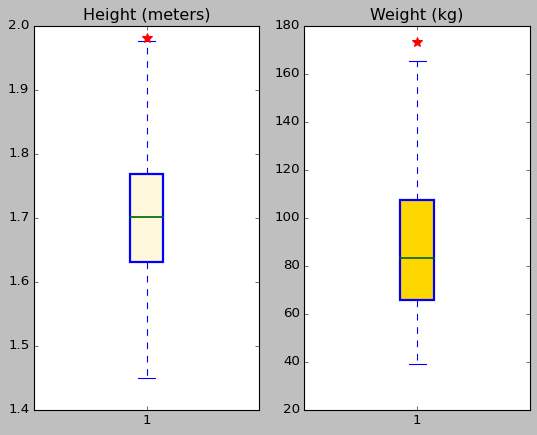

In [93]:
fig, axs = plt.subplots(nrows=1, ncols=2)
# create the first of two panels and set current axis
#plt.subplot(1, 2, 1) # (rows, columns, panel number)
axs[0].boxplot(obesity['Height'],patch_artist=True,
            boxprops=dict(facecolor='cornsilk', color='blue',
                          linewidth=2),
            capprops=dict(color='blue' ),
            whiskerprops=dict(color='blue'),
            flierprops=dict(marker = '*', color='red', 
                            markeredgecolor='red', markersize=9),
            medianprops=dict(color='darkgreen', linewidth=1.5))
axs[0].set_title("Height (meters)")

# create the second panel and set current axis
#plt.subplot(1, 2, 2)
axs[1].boxplot(obesity['Weight'],patch_artist=True,
            boxprops=dict(facecolor='gold', color='blue',
                          linewidth=2),
            capprops=dict(color='blue' ),
            whiskerprops=dict(color='blue'),
            flierprops=dict(marker = '*', color='red', 
                            markeredgecolor='red', markersize=9),
            medianprops=dict(color='darkgreen', linewidth=1.5));
axs[1].set_title("Weight (kg)")

plt.show()

Histograms for Height and Weight

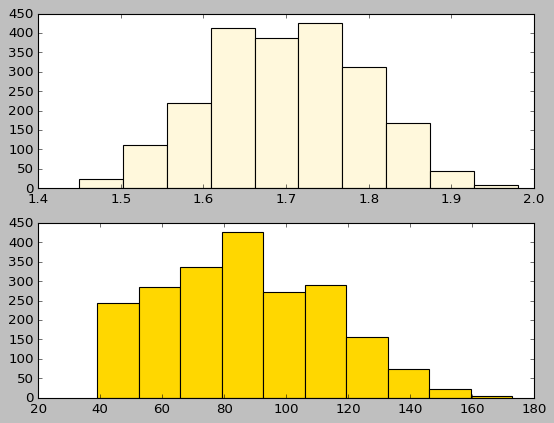

In [94]:
# create the first of two panels and set current axis
plt.subplot(2, 1, 1) # (rows, columns, panel number)
plt.hist(obesity['Height'], color='cornsilk')

# create the second panel and set current axis
plt.subplot(2, 1, 2)
plt.hist(obesity['Weight'], color='gold');


Calculate Body Mass Index (BMI) = $weight (kg)$ / $(height (m))^2$

In [95]:
# create BMI column
obesity['BMI'] = obesity['Weight'] / obesity['Height'] ** 2
obesity.head()

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad,BMI
0,Female,21.0,1.62,64.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,0.0,1.0,no,Public_Transportation,Normal_Weight,24.386526
1,Female,21.0,1.52,56.0,yes,no,3.0,3.0,Sometimes,yes,3.0,yes,3.0,0.0,Sometimes,Public_Transportation,Normal_Weight,24.238227
2,Male,23.0,1.80,77.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,2.0,1.0,Frequently,Public_Transportation,Normal_Weight,23.765432
3,Male,27.0,1.80,87.0,no,no,3.0,3.0,Sometimes,no,2.0,no,2.0,0.0,Frequently,Walking,Overweight_Level_I,26.851852
4,Male,22.0,1.78,89.8,no,no,2.0,1.0,Sometimes,no,2.0,no,0.0,0.0,Sometimes,Public_Transportation,Overweight_Level_II,28.342381


What does the distribution of BMI look like? The distribution of BMI is slightly bimodal, the mean and median are close together. The mean is slighty higher than the median indicating a slight skew to the right.  

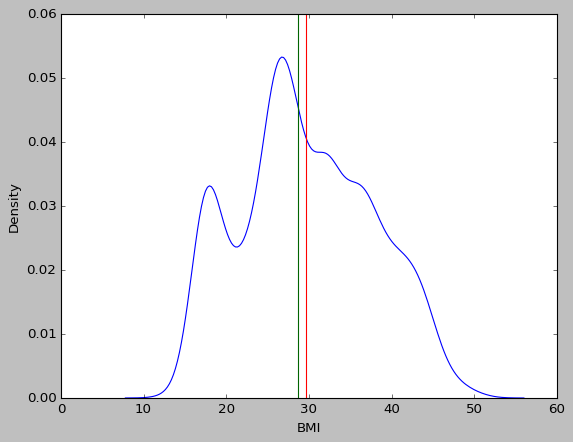

In [96]:
sns.kdeplot(obesity['BMI'])
plt.axvline(np.mean(obesity['BMI']), color='red')
plt.axvline(np.median(obesity['BMI']), color='darkgreen')

What do the distributions of BMI for men and women look like?  The distributions by gender are both multi-modal.

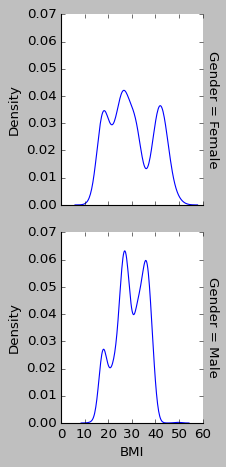

In [97]:
grid = sns.FacetGrid(obesity, row="Gender", margin_titles=True)
grid.map(sns.kdeplot, "BMI");

WHO Weight categories: https://github.com/sopranomax/DataScienceClasses/blob/main/WHO_Obesity_Categories.jpg

source: https://apps.who.int/iris/bitstream/handle/10665/43190/9241593024_eng.pdf

What are the obesity categories in the dataset?

What are the ranges for the obesity categories in the dataset?



In [98]:
# look at the obesity categories in the dataset
o_cats = set(obesity['NObeyesdad'])
o_cats

{'Insufficient_Weight',
 'Normal_Weight',
 'Obesity_Type_I',
 'Obesity_Type_II',
 'Obesity_Type_III',
 'Overweight_Level_I',
 'Overweight_Level_II'}

In [99]:
##Grouping data by gender and bmi category to compare male and female categories
bmi_by_gender = ob_clean.groupby(['Gender', 'NObeyesdad']).size().reset_index(name='Count')
bmi_by_gender


,Gender,NObeyesdad,Count
0,Female,Insufficient_Weight,173
1,Female,Normal_Weight,141
2,Female,Obesity_Type_I,156
3,Female,Obesity_Type_II,2
4,Female,Obesity_Type_III,323
5,Female,Overweight_Level_I,145
6,Female,Overweight_Level_II,103
7,Male,Insufficient_Weight,99
8,Male,Normal_Weight,146
9,Male,Obesity_Type_I,195


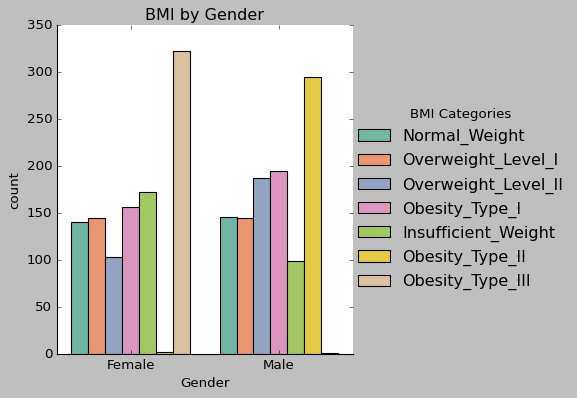

In [100]:
#barplot to visualize comparison of genders and bmi categories
g = sns.catplot(x='Gender', hue="NObeyesdad", data=obesity, kind="count", palette=sns.color_palette("Set2"))
plt.title('BMI by Gender')
g._legend.set_title("BMI Categories")

In [101]:
## order obesity categories

obesity['ob_category'] = pd.Categorical(obesity['NObeyesdad'], 
                 categories = ['Insufficient_Weight', 'Normal_Weight',
                            'Overweight_Level_I','Overweight_Level_II',
                            'Obesity_Type_I','Obesity_Type_II','Obesity_Type_III'])

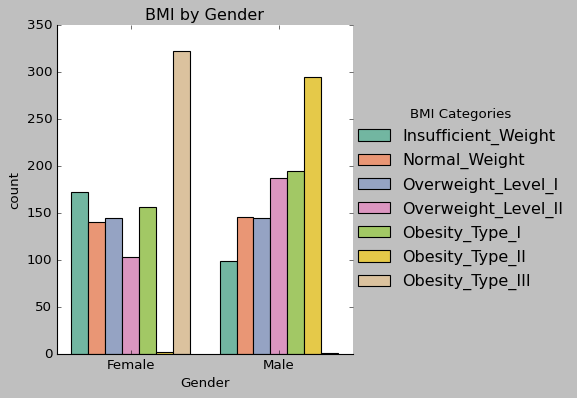

In [102]:
#barplot to visualize comparison of genders and bmi categories
g = sns.catplot(x='Gender', hue="ob_category", data=obesity, kind="count", palette=sns.color_palette("Set2"))
plt.title('BMI by Gender')
g._legend.set_title("BMI Categories")

        age_min  age_max
Gender                  
Female     15.0     61.0
Male       14.0     56.0 

                      mean_age
ob_category                   
Insufficient_Weight  19.783237
Normal_Weight        21.738676
Overweight_Level_I   23.417674
Overweight_Level_II  26.996981
Obesity_Type_I       25.884941
Obesity_Type_II      28.233785
Obesity_Type_III     23.495554 



Text(0.5, 1.0, 'Mean Age of BMI Categories')

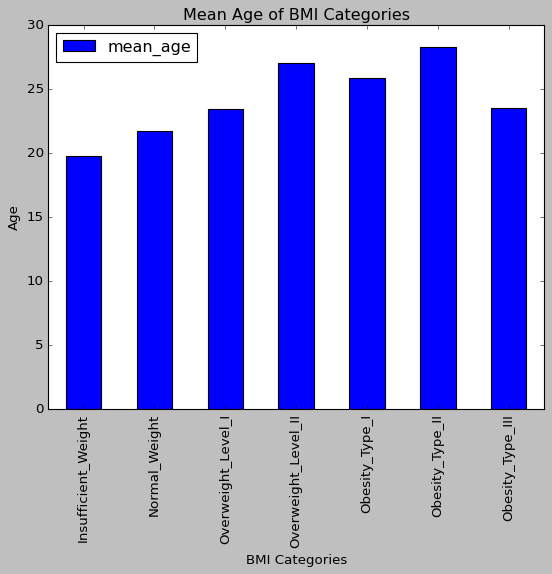

In [121]:
#age range by gender
age_by_gender = ob_clean.groupby(['Gender']).agg(age_min =('Age', 'min'), 
                                                 age_max =('Age', 'max'))
print(age_by_gender,"\n")

#grouping bmi categories by mean age of each
mean_age_bmi = obesity.groupby('ob_category').agg(mean_age = ('Age', 'mean'))
print(mean_age_bmi,"\n")

#plotting result
mean_age_bmi.plot(kind='bar')
plt.xlabel('BMI Categories')
plt.ylabel('Age')
plt.title('Mean Age of BMI Categories')

## Create a Correlation Matrix 

Investigate the relationships between variables and the calculated BMI

In [104]:
#creating correlation matrix
corrM = obesity.corr()
corrM

,Age,Height,Weight,FCVC,NCP,CH2O,FAF,TUE,BMI
Age,1.000000,-0.025958,0.202560,0.016291,-0.043944,-0.045304,-0.144938,-0.296931,0.244163
Height,-0.025958,1.000000,0.463136,-0.038121,0.243672,0.213376,0.294709,0.051912,0.131785
Weight,0.202560,0.463136,1.000000,0.216125,0.107469,0.200575,-0.051436,-0.071561,0.934806
FCVC,0.016291,-0.038121,0.216125,1.000000,0.042216,0.068461,0.019939,-0.101135,0.263651
NCP,-0.043944,0.243672,0.107469,0.042216,1.000000,0.057088,0.129504,0.036326,0.039969
CH2O,-0.045304,0.213376,0.200575,0.068461,0.057088,1.000000,0.167236,0.011965,0.144200
FAF,-0.144938,0.294709,-0.051436,0.019939,0.129504,0.167236,1.000000,0.058562,-0.177537
TUE,-0.296931,0.051912,-0.071561,-0.101135,0.036326,0.011965,0.058562,1.000000,-0.099720
BMI,0.244163,0.131785,0.934806,0.263651,0.039969,0.144200,-0.177537,-0.099720,1.000000


In [105]:
# creating a dict file 
family = {'yes': 1,'no': 0}
favc = {'yes': 1,'no': 0}
smoke = {'yes': 1,'no': 0}
scc = {'yes': 1,'no': 0}
  
# traversing through dataframe
# family, favc, smoke, scc column and writing
# values where key matches
obesity.family_history_with_overweight = [family[item] for item in obesity.family_history_with_overweight]
obesity.FAVC = [favc[item] for item in obesity.FAVC]
obesity.SMOKE = [smoke[item] for item in obesity.SMOKE]
obesity.SCC = [scc[item] for item in obesity.SCC]
obesity.head()

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad,BMI,ob_category
0,Female,21.0,1.62,64.0,1,0,2.0,3.0,Sometimes,0,2.0,0,0.0,1.0,no,Public_Transportation,Normal_Weight,24.386526,Normal_Weight
1,Female,21.0,1.52,56.0,1,0,3.0,3.0,Sometimes,1,3.0,1,3.0,0.0,Sometimes,Public_Transportation,Normal_Weight,24.238227,Normal_Weight
2,Male,23.0,1.80,77.0,1,0,2.0,3.0,Sometimes,0,2.0,0,2.0,1.0,Frequently,Public_Transportation,Normal_Weight,23.765432,Normal_Weight
3,Male,27.0,1.80,87.0,0,0,3.0,3.0,Sometimes,0,2.0,0,2.0,0.0,Frequently,Walking,Overweight_Level_I,26.851852,Overweight_Level_I
4,Male,22.0,1.78,89.8,0,0,2.0,1.0,Sometimes,0,2.0,0,0.0,0.0,Sometimes,Public_Transportation,Overweight_Level_II,28.342381,Overweight_Level_II


In [106]:
# adding to dict file
# caec - discuss with Professor how you rank categorical variables when the original question is unclear?   
caec = {'Always': 3,'Frequently': 2,'Sometimes': 1,'no': 0}
calc = {'Always': 3,'Frequently': 2,'Sometimes': 1,'no': 0}
  
# traversing through dataframe
# caec, calc column and writing
# values where key matches
obesity.CAEC = [caec[item] for item in obesity.CAEC]
obesity.CALC = [calc[item] for item in obesity.CALC]
obesity.head()

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad,BMI,ob_category
0,Female,21.0,1.62,64.0,1,0,2.0,3.0,1,0,2.0,0,0.0,1.0,0,Public_Transportation,Normal_Weight,24.386526,Normal_Weight
1,Female,21.0,1.52,56.0,1,0,3.0,3.0,1,1,3.0,1,3.0,0.0,1,Public_Transportation,Normal_Weight,24.238227,Normal_Weight
2,Male,23.0,1.80,77.0,1,0,2.0,3.0,1,0,2.0,0,2.0,1.0,2,Public_Transportation,Normal_Weight,23.765432,Normal_Weight
3,Male,27.0,1.80,87.0,0,0,3.0,3.0,1,0,2.0,0,2.0,0.0,2,Walking,Overweight_Level_I,26.851852,Overweight_Level_I
4,Male,22.0,1.78,89.8,0,0,2.0,1.0,1,0,2.0,0,0.0,0.0,1,Public_Transportation,Overweight_Level_II,28.342381,Overweight_Level_II


In [107]:
#pairwise correlation of all variables
corrM_2 = obesity.corr()
corrM_2

,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,BMI
Age,1.000000,-0.025958,0.202560,0.205725,0.063902,0.016291,-0.043944,-0.083739,0.091987,-0.045304,-0.116283,-0.144938,-0.296931,0.044487,0.244163
Height,-0.025958,1.000000,0.463136,0.247684,0.178364,-0.038121,0.243672,-0.048818,0.055499,0.213376,-0.133753,0.294709,0.051912,0.129732,0.131785
Weight,0.202560,0.463136,1.000000,0.496820,0.272300,0.216125,0.107469,-0.287493,0.025746,0.200575,-0.201906,-0.051436,-0.071561,0.206677,0.934806
family_history_with_overweight,0.205725,0.247684,0.496820,1.000000,0.208036,0.040372,0.071370,-0.169787,0.017385,0.147437,-0.185422,-0.056673,0.022943,-0.036676,0.483508
FAVC,0.063902,0.178364,0.272300,0.208036,1.000000,-0.027283,-0.007000,-0.150068,-0.050660,0.009719,-0.190658,-0.107995,0.068417,0.089520,0.246097
FCVC,0.016291,-0.038121,0.216125,0.040372,-0.027283,1.000000,0.042216,0.054670,0.014320,0.068461,0.071852,0.019939,-0.101135,0.060781,0.263651
NCP,-0.043944,0.243672,0.107469,0.071370,-0.007000,0.042216,1.000000,0.097801,0.007811,0.057088,-0.015624,0.129504,0.036326,0.071747,0.039969
CAEC,-0.083739,-0.048818,-0.287493,-0.169787,-0.150068,0.054670,0.097801,1.000000,0.055282,-0.144995,0.109179,0.030110,0.048567,-0.047540,-0.313278
SMOKE,0.091987,0.055499,0.025746,0.017385,-0.050660,0.014320,0.007811,0.055282,1.000000,-0.031995,0.047731,0.011216,0.017613,0.082471,-0.000819
CH2O,-0.045304,0.213376,0.200575,0.147437,0.009719,0.068461,0.057088,-0.144995,-0.031995,1.000000,0.008036,0.167236,0.011965,0.091386,0.144200


In [108]:
#changing name 'family_history_with_overweight' column for matrix aesthitics purposes
corrM_2.rename(columns={'family_history_with_overweight': 'Family'}, inplace=True)
corrM_2.rename(index={'family_history_with_overweight': 'Family'}, inplace=True)
corrM_2

,Age,Height,Weight,Family,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,BMI
Age,1.000000,-0.025958,0.202560,0.205725,0.063902,0.016291,-0.043944,-0.083739,0.091987,-0.045304,-0.116283,-0.144938,-0.296931,0.044487,0.244163
Height,-0.025958,1.000000,0.463136,0.247684,0.178364,-0.038121,0.243672,-0.048818,0.055499,0.213376,-0.133753,0.294709,0.051912,0.129732,0.131785
Weight,0.202560,0.463136,1.000000,0.496820,0.272300,0.216125,0.107469,-0.287493,0.025746,0.200575,-0.201906,-0.051436,-0.071561,0.206677,0.934806
Family,0.205725,0.247684,0.496820,1.000000,0.208036,0.040372,0.071370,-0.169787,0.017385,0.147437,-0.185422,-0.056673,0.022943,-0.036676,0.483508
FAVC,0.063902,0.178364,0.272300,0.208036,1.000000,-0.027283,-0.007000,-0.150068,-0.050660,0.009719,-0.190658,-0.107995,0.068417,0.089520,0.246097
FCVC,0.016291,-0.038121,0.216125,0.040372,-0.027283,1.000000,0.042216,0.054670,0.014320,0.068461,0.071852,0.019939,-0.101135,0.060781,0.263651
NCP,-0.043944,0.243672,0.107469,0.071370,-0.007000,0.042216,1.000000,0.097801,0.007811,0.057088,-0.015624,0.129504,0.036326,0.071747,0.039969
CAEC,-0.083739,-0.048818,-0.287493,-0.169787,-0.150068,0.054670,0.097801,1.000000,0.055282,-0.144995,0.109179,0.030110,0.048567,-0.047540,-0.313278
SMOKE,0.091987,0.055499,0.025746,0.017385,-0.050660,0.014320,0.007811,0.055282,1.000000,-0.031995,0.047731,0.011216,0.017613,0.082471,-0.000819
CH2O,-0.045304,0.213376,0.200575,0.147437,0.009719,0.068461,0.057088,-0.144995,-0.031995,1.000000,0.008036,0.167236,0.011965,0.091386,0.144200


In [109]:
#converting dataset to a dataframe to chart
ob_corr_df = pd.DataFrame(corrM_2)
ob_corr_df

,Age,Height,Weight,Family,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,BMI
Age,1.000000,-0.025958,0.202560,0.205725,0.063902,0.016291,-0.043944,-0.083739,0.091987,-0.045304,-0.116283,-0.144938,-0.296931,0.044487,0.244163
Height,-0.025958,1.000000,0.463136,0.247684,0.178364,-0.038121,0.243672,-0.048818,0.055499,0.213376,-0.133753,0.294709,0.051912,0.129732,0.131785
Weight,0.202560,0.463136,1.000000,0.496820,0.272300,0.216125,0.107469,-0.287493,0.025746,0.200575,-0.201906,-0.051436,-0.071561,0.206677,0.934806
Family,0.205725,0.247684,0.496820,1.000000,0.208036,0.040372,0.071370,-0.169787,0.017385,0.147437,-0.185422,-0.056673,0.022943,-0.036676,0.483508
FAVC,0.063902,0.178364,0.272300,0.208036,1.000000,-0.027283,-0.007000,-0.150068,-0.050660,0.009719,-0.190658,-0.107995,0.068417,0.089520,0.246097
FCVC,0.016291,-0.038121,0.216125,0.040372,-0.027283,1.000000,0.042216,0.054670,0.014320,0.068461,0.071852,0.019939,-0.101135,0.060781,0.263651
NCP,-0.043944,0.243672,0.107469,0.071370,-0.007000,0.042216,1.000000,0.097801,0.007811,0.057088,-0.015624,0.129504,0.036326,0.071747,0.039969
CAEC,-0.083739,-0.048818,-0.287493,-0.169787,-0.150068,0.054670,0.097801,1.000000,0.055282,-0.144995,0.109179,0.030110,0.048567,-0.047540,-0.313278
SMOKE,0.091987,0.055499,0.025746,0.017385,-0.050660,0.014320,0.007811,0.055282,1.000000,-0.031995,0.047731,0.011216,0.017613,0.082471,-0.000819
CH2O,-0.045304,0.213376,0.200575,0.147437,0.009719,0.068461,0.057088,-0.144995,-0.031995,1.000000,0.008036,0.167236,0.011965,0.091386,0.144200


In [110]:
#removing FCVC, NCP, CH20, SCC, and TUE columns as we are unclear on the nature of the data (how were the questions asked)?
ob_corr_df.drop(["FCVC", "NCP", "CH2O", "SCC", "TUE"], axis = 1, inplace = True)

In [111]:
#removing rows of same name as above
ob_corr_df = ob_corr_df.drop(labels=["FCVC", "NCP", "CH2O", "SCC", "TUE"], axis=0, index=None, columns=None, level=None, inplace=False)

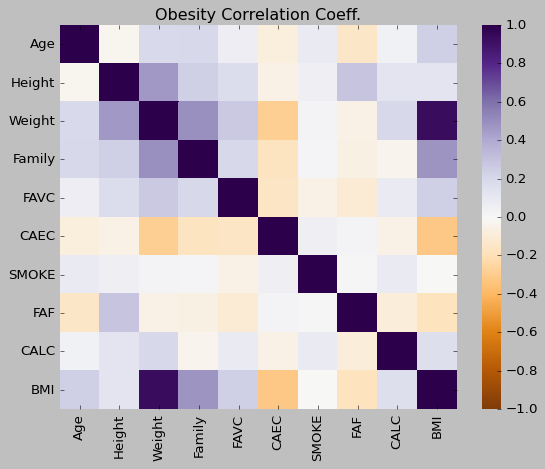


 FAVC - Frequent consumption of high caloric food
 CALC - Consumption of alcohol
 FAF  - Pysical activity frequency
 CAEC - Consumption of food between meals


In [126]:
#creating heat map of correlated data
ob_heatmap = sns.heatmap(ob_corr_df, cmap="PuOr", vmin=-1, vmax=1)
ob_heatmap.set_title("Obesity Correlation Coeff.")

plt.show()
print('\n FAVC - Frequent consumption of high caloric food\n',
      'CALC - Consumption of alcohol\n',
      'FAF  - Pysical activity frequency\n',
      'CAEC - Consumption of food between meals')

## Bootstrap inference of Median

Nonparametric inference of the median for the BMI variable.

Perform a bootstrap sampling using a sample of 10% of the data size:

In [113]:
print('Data size = ',len(obesity))
n = round(len(obesity) * 0.10)
print('Sample size = ', n)


Data size =  2111
Sample size =  211


Bootstrap using numpy

Population BMI median =  28.71908906003529 

Inferred median for BMI (using Numpy) =  28.488001934844466
Standard Error for sampling distribution =  0.8873806511333528 

95% CI for BMI median =  [27.01879735 31.19772906]


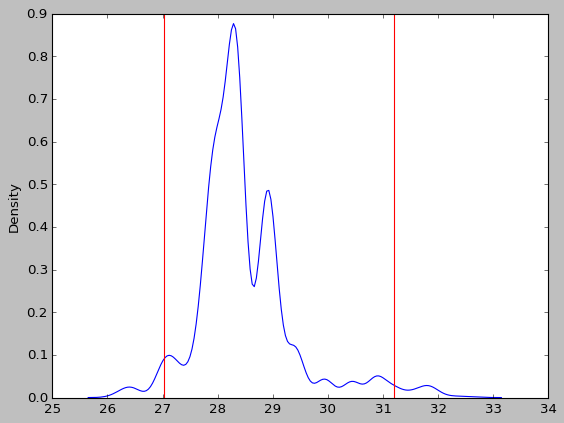

In [114]:
# initialize the sample list
bmi_median_samples = []

# create the original sample
original_sample = np.random.choice(obesity['BMI'], n)

# perform bootstrap with replacement using numpy
for i in range(5000):
        boot_sample = np.random.choice(original_sample, n)
        bmi_median_samples.append(np.median(boot_sample))

bmi_median = np.median(obesity['BMI'])        
print("Population BMI median = ", bmi_median, "\n")
print("Inferred median for BMI (using Numpy) = ", np.mean(bmi_median_samples))
print("Standard Error for sampling distribution = ", np.std(bmi_median_samples), "\n")

conf_int = np.percentile(bmi_median_samples, [2.5, 97.5])
print("95% CI for BMI median = ", conf_int)

sns.kdeplot(bmi_median_samples)
for endpoint in conf_int:
    plt.axvline(endpoint, color='red')


Bootstrap using resample

Population BMI median =  28.71908906003529 

Inferred median for BMI (using resample)=  28.50407603026568
Standard Error for sampling distribution =  0.8538202988052241 

95% CI for BMI median =  [27.01879735 30.91336697]


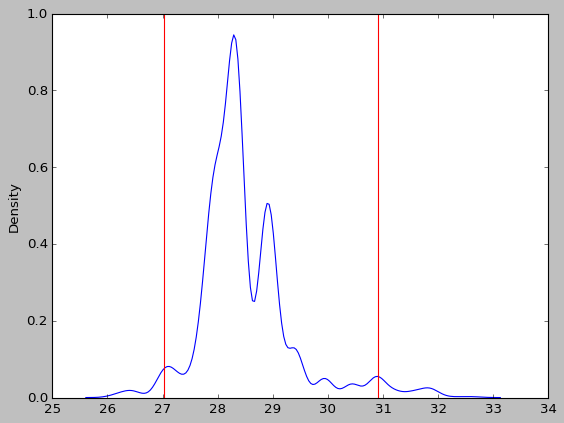

In [115]:
from sklearn.utils import resample

# perform bootstrap using sklean resample

bmi_median_samples = []
for i in range(5000):
                boot_sample = resample(original_sample)           # does bootstrap; replace = True
                bmi_median_samples.append(np.median(boot_sample))

print("Population BMI median = ", bmi_median, "\n")        
print("Inferred median for BMI (using resample)= ", np.mean(bmi_median_samples))
print("Standard Error for sampling distribution = ", np.std(bmi_median_samples), "\n")
conf_int = np.percentile(bmi_median_samples, [2.5, 97.5])
print("95% CI for BMI median = ", conf_int)

sns.kdeplot(bmi_median_samples)
for endpoint in conf_int:
    plt.axvline(endpoint, color='red')